In [1]:
import gurobipy as gp
from gurobipy import GRB
import pandas as pd
import numpy as np

# QUESTION 1

In [4]:
delivery = pd.read_csv('https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/delivery.csv')
delivery

,Unnamed: 0,Size,Depot,Customer_1,Customer_2,Customer_3,Customer_4,Customer_5,Customer_6,Customer_7,Customer_8,Customer_9,Customer_10,Customer_11,Customer_12,Customer_13,Customer_14,Customer_15
0,Customer_1,3614.258155,22.793623,0.000000,18.182319,6.987729,7.678954,13.694510,8.329835,12.811331,11.318991,15.708546,12.106011,14.568374,20.642632,15.469589,13.696646,20.036904
1,Customer_2,2084.033455,20.549610,18.182319,0.000000,13.441909,23.413009,12.379373,8.802658,14.771390,19.420864,10.554106,21.996704,9.272869,14.903864,20.722340,21.779559,18.747650
2,Customer_3,1675.128584,2.150799,6.987729,13.441909,0.000000,9.027693,15.271752,11.090113,17.949967,9.428343,16.277598,20.421898,15.631096,10.987299,7.610090,23.582960,18.073724
3,Customer_4,2686.814929,15.998685,7.678954,23.413009,9.027693,0.000000,13.529232,15.887557,16.872246,18.641042,15.578955,18.062265,15.809172,12.307230,15.296024,10.108355,13.404692
4,Customer_5,3842.413770,9.327903,13.694510,12.379373,15.271752,13.529232,0.000000,10.943846,17.210991,12.290085,10.398820,12.638817,19.039575,8.938190,19.624197,11.997656,16.242980
5,Customer_6,1543.327493,14.338588,8.329835,8.802658,11.090113,15.887557,10.943846,0.000000,11.083877,12.895180,21.809757,18.748572,11.346177,20.955126,12.382848,14.034171,10.275895
6,Customer_7,423.104792,4.716093,12.811331,14.771390,17.949967,16.872246,17.210991,11.083877,0.000000,13.921626,13.094882,10.247036,17.225741,13.112054,17.492188,14.286843,17.553653
7,Customer_8,772.089875,23.942911,11.318991,19.420864,9.428343,18.641042,12.290085,12.895180,13.921626,0.000000,11.909236,9.302199,18.923284,16.165367,11.989881,17.207899,20.410760
8,Customer_9,1159.807009,22.496673,15.708546,10.554106,16.277598,15.578955,10.398820,21.809757,13.094882,11.909236,0.000000,12.894249,16.853413,17.332640,22.532072,15.230985,15.076411
9,Customer_10,2286.050615,2.921730,12.106011,21.996704,20.421898,18.062265,12.638817,18.748572,10.247036,9.302199,12.894249,0.000000,15.286151,15.799132,12.360215,17.759712,16.609838


1e

Data loaded successfully:
   Unnamed: 0         Size      Depot  Customer_1  Customer_2  Customer_3  \
0  Customer_1  3614.258155  22.793623    0.000000   18.182319    6.987729   
1  Customer_2  2084.033455  20.549610   18.182319    0.000000   13.441909   
2  Customer_3  1675.128584   2.150799    6.987729   13.441909    0.000000   
3  Customer_4  2686.814929  15.998685    7.678954   23.413009    9.027693   
4  Customer_5  3842.413770   9.327903   13.694510   12.379373   15.271752   

   Customer_4  Customer_5  Customer_6  Customer_7  Customer_8  Customer_9  \
0    7.678954   13.694510    8.329835   12.811331   11.318991   15.708546   
1   23.413009   12.379373    8.802658   14.771390   19.420864   10.554106   
2    9.027693   15.271752   11.090113   17.949967    9.428343   16.277598   
3    0.000000   13.529232   15.887557   16.872246   18.641042   15.578955   
4   13.529232    0.000000   10.943846   17.210991   12.290085   10.398820   

   Customer_10  Customer_11  Customer_12  Custom

OSError: [Errno 30] Read-only file system: '/fedex_solution.png'

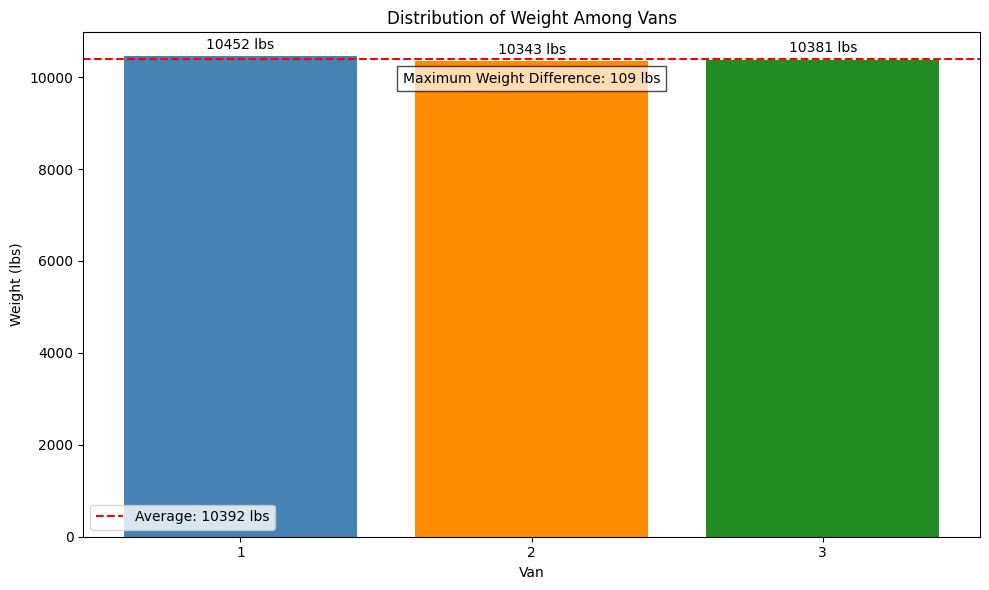

In [5]:
import pandas as pd
import numpy as np
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt

# Load the data
url = 'https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/delivery.csv'
delivery = pd.read_csv(url)
print("Data loaded successfully:")
print(delivery.head())

# Extract the necessary data
num_customers = delivery.shape[0]  # 15 customers
weights = delivery['Size'].values  # Package weights
depot_distances = delivery['Depot'].values  # Distances from depot

# Create distance matrix between customers
distances = np.zeros((num_customers, num_customers))
for i in range(num_customers):
    for j in range(num_customers):
        if i != j:
            distances[i, j] = delivery[f'Customer_{j+1}'].iloc[i]

# Problem parameters
num_vans = 3
max_weight_per_van = 15000  # 15,000 lbs
max_distance_per_van = 254  # 254 km

# Display information about the data
print(f"\nNumber of customers: {num_customers}")
print(f"Total weight to deliver: {sum(weights)} lbs")
print(f"Package weights (lbs): {weights}")
print(f"Number of vans available: {num_vans}")
print(f"Maximum weight per van: {max_weight_per_van} lbs")
print(f"Maximum distance per van: {max_distance_per_van} km")

# Create the Gurobi model
model = gp.Model("FedEx_VRP")

# Decision variables
# x[i,v] = 1 if customer i is assigned to van v
x = model.addVars(num_customers, num_vans, vtype=GRB.BINARY, name="x")

# y[v] = total weight assigned to van v
y = model.addVars(num_vans, vtype=GRB.CONTINUOUS, name="y")

# z = maximum difference in load between any two vans
z = model.addVar(vtype=GRB.CONTINUOUS, name="z")

# Constraint: Each customer must be assigned to exactly one van
for i in range(num_customers):
    model.addConstr(gp.quicksum(x[i,v] for v in range(num_vans)) == 1, f"Customer_{i+1}_Assignment")

# Constraint: Calculate total weight for each van
for v in range(num_vans):
    model.addConstr(y[v] == gp.quicksum(weights[i] * x[i,v] for i in range(num_customers)), f"Van_{v+1}_Weight")

# Constraint: Maximum weight difference between any two vans
for v1 in range(num_vans):
    for v2 in range(v1+1, num_vans):
        model.addConstr(y[v1] - y[v2] <= z, f"Weight_Diff_{v1+1}_{v2+1}_Plus")
        model.addConstr(y[v2] - y[v1] <= z, f"Weight_Diff_{v1+1}_{v2+1}_Minus")

# Constraint: Maximum weight per van is 15,000 lbs
for v in range(num_vans):
    model.addConstr(y[v] <= max_weight_per_van, f"Max_Weight_Van_{v+1}")

# Constraint: No more than two of customers 7-9 can be assigned to the same van
for v in range(num_vans):
    model.addConstr(x[6,v] + x[7,v] + x[8,v] <= 2, f"Constraint_Customers_7_to_9_Van_{v+1}")

# Constraint: Customers 10-12 must all be assigned to the same van
for v in range(num_vans):
    model.addConstr(x[9,v] == x[10,v], f"Constraint_Customers_10_11_Same_Van_{v+1}")
    model.addConstr(x[10,v] == x[11,v], f"Constraint_Customers_11_12_Same_Van_{v+1}")

# Constraint: If customer 1 is assigned to a van, at least one of 13 or 14 must also be assigned
for v in range(num_vans):
    model.addConstr(x[0,v] <= x[12,v] + x[13,v], f"Constraint_Customer_1_13_14_Van_{v+1}")

# Constraint: Customer 2 cannot be with customers 3, 4, and 5
for v in range(num_vans):
    model.addConstr(x[1,v] + x[2,v] + x[3,v] + x[4,v] <= 3, f"Constraint_Customer_2_345_Van_{v+1}")

# Constraint: No van can make more than 5 deliveries
for v in range(num_vans):
    model.addConstr(gp.quicksum(x[i,v] for i in range(num_customers)) <= 5, f"Max_Deliveries_Van_{v+1}")

# Constraint: Battery range - simplified approach without subtour elimination
for v in range(num_vans):
    model.addConstr(
        gp.quicksum(2 * depot_distances[i] * x[i,v] for i in range(num_customers)) <= max_distance_per_van,
        f"Max_Distance_Van_{v+1}"
    )

# Set the objective function: Minimize the maximum weight difference
model.setObjective(z, GRB.MINIMIZE)

# Print model statistics
print(f"\nModel statistics:")
print(f"Number of variables: {model.numVars}")
print(f"Number of binary variables: {sum(1 for v in model.getVars() if v.vtype == GRB.BINARY)}")
print(f"Number of constraints: {model.numConstrs}")

# Optimize the model
print("\nSolving the model...")
model.optimize()

# Print results
if model.status == GRB.OPTIMAL:
    print("\nOptimal solution found!")
    print(f"Optimal objective value (minimum maximum weight difference): {model.objVal} lbs")
    
    # Print the assignment of customers to vans
    for v in range(num_vans):
        assigned_customers = [i+1 for i in range(num_customers) if x[i,v].X > 0.5]
        van_weight = sum(weights[i] for i in range(num_customers) if x[i,v].X > 0.5)
        approx_distance = sum(2 * depot_distances[i] for i in range(num_customers) if x[i,v].X > 0.5)
        
        print(f"\nVan {v+1}:")
        print(f"  Customers: {assigned_customers}")
        print(f"  Total Weight: {van_weight} lbs")
        print(f"  Approx. Distance: {approx_distance} km")
        print(f"  Number of Deliveries: {len(assigned_customers)}")
    
    # Calculate the total weight to verify the solution
    total_weight = sum(weights)
    print(f"\nTotal weight of all deliveries: {total_weight} lbs")
    print(f"Average weight per van: {total_weight/num_vans:.2f} lbs")
    
    # Calculate the weight difference between each pair of vans to verify the objective
    van_weights = [sum(weights[i] for i in range(num_customers) if x[i,v].X > 0.5) for v in range(num_vans)]
    max_diff = max(abs(van_weights[i] - van_weights[j]) for i in range(num_vans) for j in range(i+1, num_vans))
    print(f"Maximum weight difference (verification): {max_diff} lbs")
    
    # Create visualization of the results
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(range(1, num_vans+1), van_weights, color=['steelblue', 'darkorange', 'forestgreen'])
    
    ax.set_xlabel('Van')
    ax.set_ylabel('Weight (lbs)')
    ax.set_title('Distribution of Weight Among Vans')
    ax.set_xticks(range(1, num_vans+1))
    
    # Add weight labels on top of each bar
    for bar, weight in zip(bars, van_weights):
        ax.text(bar.get_x() + bar.get_width()/2, weight + 100, 
                f"{weight:.0f} lbs", ha='center', va='bottom')
    
    # Add a line for the average weight
    avg_weight = total_weight / num_vans
    ax.axhline(y=avg_weight, color='red', linestyle='--', label=f'Average: {avg_weight:.0f} lbs')
    
    # Add text showing the objective value (max difference)
    ax.text(0.5, 0.9, f"Maximum Weight Difference: {model.objVal:.0f} lbs", 
            transform=ax.transAxes, ha='center', bbox=dict(facecolor='white', alpha=0.7))
    
    ax.legend()
    plt.tight_layout()
    plt.savefig('fedex_solution.png')
    plt.show()
else:
    print(f"Optimization failed with status {model.status}")

1g

Data loaded successfully:
   Unnamed: 0         Size      Depot  Customer_1  Customer_2  Customer_3  \
0  Customer_1  3614.258155  22.793623    0.000000   18.182319    6.987729   
1  Customer_2  2084.033455  20.549610   18.182319    0.000000   13.441909   
2  Customer_3  1675.128584   2.150799    6.987729   13.441909    0.000000   
3  Customer_4  2686.814929  15.998685    7.678954   23.413009    9.027693   
4  Customer_5  3842.413770   9.327903   13.694510   12.379373   15.271752   

   Customer_4  Customer_5  Customer_6  Customer_7  Customer_8  Customer_9  \
0    7.678954   13.694510    8.329835   12.811331   11.318991   15.708546   
1   23.413009   12.379373    8.802658   14.771390   19.420864   10.554106   
2    9.027693   15.271752   11.090113   17.949967    9.428343   16.277598   
3    0.000000   13.529232   15.887557   16.872246   18.641042   15.578955   
4   13.529232    0.000000   10.943846   17.210991   12.290085   10.398820   

   Customer_10  Customer_11  Customer_12  Custom

OSError: [Errno 30] Read-only file system: '/fedex_solution.png'

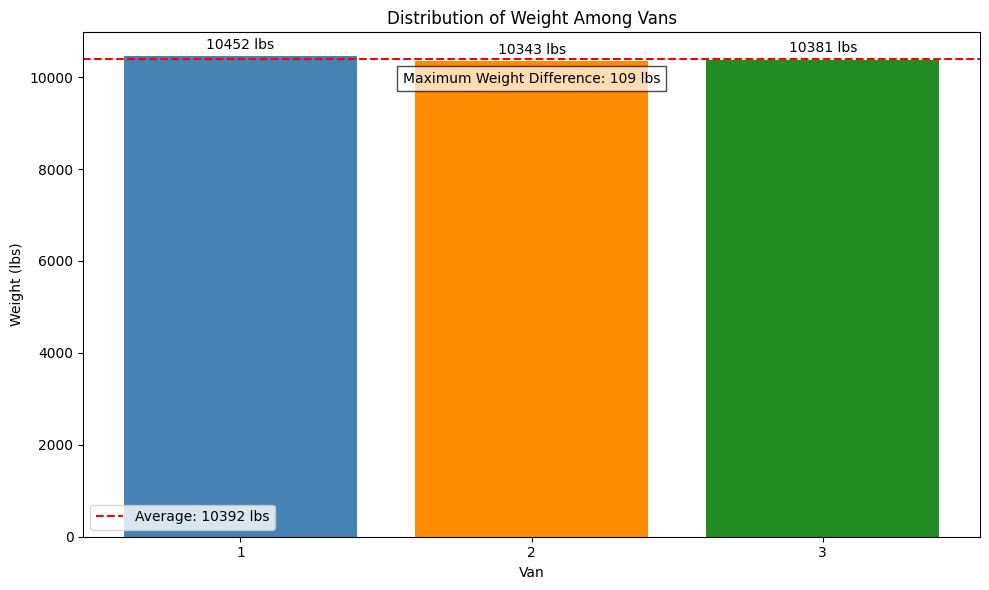

In [6]:
import pandas as pd
import numpy as np
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt

# Load the data
url = 'https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/delivery.csv'
delivery = pd.read_csv(url)
print("Data loaded successfully:")
print(delivery.head())

# Extract the necessary data
num_customers = delivery.shape[0]  # 15 customers
weights = delivery['Size'].values  # Package weights
depot_distances = delivery['Depot'].values  # Distances from depot

# Create distance matrix between customers
distances = np.zeros((num_customers, num_customers))
for i in range(num_customers):
    for j in range(num_customers):
        if i != j:
            distances[i, j] = delivery[f'Customer_{j+1}'].iloc[i]

# Problem parameters
num_vans = 3
max_weight_per_van = 15000  # 15,000 lbs
max_distance_per_van = 254  # 254 km

# Display information about the data
print(f"\nNumber of customers: {num_customers}")
print(f"Total weight to deliver: {sum(weights)} lbs")
print(f"Package weights (lbs): {weights}")
print(f"Number of vans available: {num_vans}")
print(f"Maximum weight per van: {max_weight_per_van} lbs")
print(f"Maximum distance per van: {max_distance_per_van} km")

# Create the Gurobi model
model = gp.Model("FedEx_VRP")

# Decision variables
# x[i,v] = 1 if customer i is assigned to van v
x = model.addVars(num_customers, num_vans, vtype=GRB.BINARY, name="x")

# y[v] = total weight assigned to van v
y = model.addVars(num_vans, vtype=GRB.CONTINUOUS, name="y")

# z = maximum difference in load between any two vans
z = model.addVar(vtype=GRB.CONTINUOUS, name="z")

# Constraint: Each customer must be assigned to exactly one van
for i in range(num_customers):
    model.addConstr(gp.quicksum(x[i,v] for v in range(num_vans)) == 1, f"Customer_{i+1}_Assignment")

# Constraint: Calculate total weight for each van
for v in range(num_vans):
    model.addConstr(y[v] == gp.quicksum(weights[i] * x[i,v] for i in range(num_customers)), f"Van_{v+1}_Weight")

# Constraint: Maximum weight difference between any two vans
for v1 in range(num_vans):
    for v2 in range(v1+1, num_vans):
        model.addConstr(y[v1] - y[v2] <= z, f"Weight_Diff_{v1+1}_{v2+1}_Plus")
        model.addConstr(y[v2] - y[v1] <= z, f"Weight_Diff_{v1+1}_{v2+1}_Minus")

# Constraint: Maximum weight per van is 15,000 lbs
for v in range(num_vans):
    model.addConstr(y[v] <= max_weight_per_van, f"Max_Weight_Van_{v+1}")

# Constraint: No more than two of customers 7-9 can be assigned to the same van
for v in range(num_vans):
    model.addConstr(x[6,v] + x[7,v] + x[8,v] <= 2, f"Constraint_Customers_7_to_9_Van_{v+1}")

# Constraint: Customers 10-12 must all be assigned to the same van
for v in range(num_vans):
    model.addConstr(x[9,v] == x[10,v], f"Constraint_Customers_10_11_Same_Van_{v+1}")
    model.addConstr(x[10,v] == x[11,v], f"Constraint_Customers_11_12_Same_Van_{v+1}")

# Constraint: If customer 1 is assigned to a van, at least one of 13 or 14 must also be assigned
for v in range(num_vans):
    model.addConstr(x[0,v] <= x[12,v] + x[13,v], f"Constraint_Customer_1_13_14_Van_{v+1}")

# Constraint: Customer 2 cannot be with customers 3, 4, and 5
for v in range(num_vans):
    model.addConstr(x[1,v] + x[2,v] + x[3,v] + x[4,v] <= 3, f"Constraint_Customer_2_345_Van_{v+1}")

# Constraint: No van can make more than 5 deliveries
for v in range(num_vans):
    model.addConstr(gp.quicksum(x[i,v] for i in range(num_customers)) <= 5, f"Max_Deliveries_Van_{v+1}")

# Constraint: Battery range - simplified approach without subtour elimination
for v in range(num_vans):
    model.addConstr(
        gp.quicksum(2 * depot_distances[i] * x[i,v] for i in range(num_customers)) <= max_distance_per_van,
        f"Max_Distance_Van_{v+1}"
    )

# Set the objective function: Minimize the maximum weight difference
model.setObjective(z, GRB.MINIMIZE)

# Print model statistics
print(f"\nModel statistics:")
print(f"Number of variables: {model.numVars}")
print(f"Number of binary variables: {sum(1 for v in model.getVars() if v.vtype == GRB.BINARY)}")
print(f"Number of constraints: {model.numConstrs}")

# Optimize the model
print("\nSolving the model...")
model.optimize()

# Print results
if model.status == GRB.OPTIMAL:
    print("\nOptimal solution found!")
    print(f"Optimal objective value (minimum maximum weight difference): {model.objVal} lbs")
    
    # Print the assignment of customers to vans
    for v in range(num_vans):
        assigned_customers = [i+1 for i in range(num_customers) if x[i,v].X > 0.5]
        van_weight = sum(weights[i] for i in range(num_customers) if x[i,v].X > 0.5)
        approx_distance = sum(2 * depot_distances[i] for i in range(num_customers) if x[i,v].X > 0.5)
        
        print(f"\nVan {v+1}:")
        print(f"  Customers: {assigned_customers}")
        print(f"  Total Weight: {van_weight} lbs")
        print(f"  Approx. Distance: {approx_distance} km")
        print(f"  Number of Deliveries: {len(assigned_customers)}")
    
    # Calculate the total weight to verify the solution
    total_weight = sum(weights)
    print(f"\nTotal weight of all deliveries: {total_weight} lbs")
    print(f"Average weight per van: {total_weight/num_vans:.2f} lbs")
    
    # Calculate the weight difference between each pair of vans to verify the objective
    van_weights = [sum(weights[i] for i in range(num_customers) if x[i,v].X > 0.5) for v in range(num_vans)]
    max_diff = max(abs(van_weights[i] - van_weights[j]) for i in range(num_vans) for j in range(i+1, num_vans))
    print(f"Maximum weight difference (verification): {max_diff} lbs")
    
    # Create visualization of the results
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(range(1, num_vans+1), van_weights, color=['steelblue', 'darkorange', 'forestgreen'])
    
    ax.set_xlabel('Van')
    ax.set_ylabel('Weight (lbs)')
    ax.set_title('Distribution of Weight Among Vans')
    ax.set_xticks(range(1, num_vans+1))
    
    # Add weight labels on top of each bar
    for bar, weight in zip(bars, van_weights):
        ax.text(bar.get_x() + bar.get_width()/2, weight + 100, 
                f"{weight:.0f} lbs", ha='center', va='bottom')
    
    # Add a line for the average weight
    avg_weight = total_weight / num_vans
    ax.axhline(y=avg_weight, color='red', linestyle='--', label=f'Average: {avg_weight:.0f} lbs')
    
    # Add text showing the objective value (max difference)
    ax.text(0.5, 0.9, f"Maximum Weight Difference: {model.objVal:.0f} lbs", 
            transform=ax.transAxes, ha='center', bbox=dict(facecolor='white', alpha=0.7))
    
    ax.legend()
    plt.tight_layout()
    plt.savefig('fedex_solution.png')
    plt.show()
else:
    print(f"Optimization failed with status {model.status}")

# QUESTION 2

In [3]:
cost = pd.read_csv('https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/cost.csv')
time = pd.read_csv('https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/time.csv')

In [7]:
cost

,Unnamed: 0,Customer 1,Customer 2,Customer 3,Customer 4,Customer 5,Customer 6,Customer 7
0,Customer 1,1000,761,443,513,485,260,413
1,Customer 2,352,1000,956,574,575,882,662
2,Customer 3,666,584,1000,120,266,487,415
3,Customer 4,341,445,439,1000,466,527,134
4,Customer 5,180,661,487,489,1000,871,802
5,Customer 6,829,261,369,915,555,1000,826
6,Customer 7,824,848,978,316,140,114,1000


In [8]:
time

,Unnamed: 0,Customer 1,Customer 2,Customer 3,Customer 4,Customer 5,Customer 6,Customer 7
0,Customer 1,50,2,44,38,21,12,22
1,Customer 2,44,50,49,42,16,47,44
2,Customer 3,3,7,50,9,18,25,14
3,Customer 4,9,2,28,50,7,8,14
4,Customer 5,36,40,2,42,50,29,18
5,Customer 6,44,10,31,15,14,50,40
6,Customer 7,16,18,24,45,29,45,50


2e

In [10]:
import pandas as pd
import numpy as np
import gurobipy as gp
from gurobipy import GRB
import math
import time

# Load the cost and time data
cost = pd.read_csv('https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/cost.csv')
time_data = pd.read_csv('https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/time.csv')

# Display to confirm data loaded correctly
print("Cost data shape:", cost.shape)
print("Time data shape:", time_data.shape)

# Extract customer information
customers = cost.columns[1:].tolist()
n_customers = len(customers)
print(f"Number of customers: {n_customers}")

# Set Monte Carlo parameters
n_trials = 50
n_scenarios = 100

# Cost parameters
disposal_cost = 5  # $5 per unit disposal cost
shortage_penalty = 2000  # $2000 per unit shortage penalty
max_conversion_time = 724  # Maximum conversion time in hours

# Function to generate demand scenarios based on customer distributions
def generate_demand_scenarios(n_scenarios):
    scenarios = np.zeros((n_scenarios, n_customers))
    
    # Customer 1: Normal(loc=15000, scale=1000)
    scenarios[:, 0] = np.random.normal(loc=15000, scale=1000, size=n_scenarios)
    
    # Customer 2: Exponential(scale=15000)
    scenarios[:, 1] = np.random.exponential(scale=15000, size=n_scenarios)
    
    # Customer 3: Uniform(low=10000, high=20000)
    scenarios[:, 2] = np.random.uniform(low=10000, high=20000, size=n_scenarios)
    
    # Customer 4: Normal(loc=15000, scale=500)
    scenarios[:, 3] = np.random.normal(loc=15000, scale=500, size=n_scenarios)
    
    # Customer 5: Exponential(scale=7500)
    scenarios[:, 4] = np.random.exponential(scale=7500, size=n_scenarios)
    
    # Customer 6: Uniform(low=12000, high=18000)
    scenarios[:, 5] = np.random.uniform(low=12000, high=18000, size=n_scenarios)
    
    # Customer 7: Normal(loc=15000, scale=2000)
    scenarios[:, 6] = np.random.normal(loc=15000, scale=2000, size=n_scenarios)
    
    # Round to integers and ensure non-negative
    scenarios = np.maximum(np.round(scenarios), 0)
    
    return scenarios

# Convert DataFrame to numpy array for easier access
cost_matrix = cost.iloc[:, 1:].values
time_matrix = time_data.iloc[:, 1:].values

# Function to solve one SAA problem with given scenarios
def solve_saa_instance(scenarios):
    model = gp.Model("Dye_Production_SAA")
    model.setParam('OutputFlag', 0)  # Turn off output for cleaner execution
    
    # First-stage variables: amount of dye to produce for each customer type
    x = model.addVars(n_customers, lb=0, vtype=GRB.CONTINUOUS, name="produce")
    
    # Second-stage variables (for each scenario)
    # Amount to convert from type i to type j
    y = {}
    # Amount of shortage for each customer type
    shortage = {}
    # Amount to dispose for each customer type
    dispose = {}
    
    for s in range(n_scenarios):
        y[s] = model.addVars(n_customers, n_customers, lb=0, vtype=GRB.CONTINUOUS, name=f"convert_{s}")
        shortage[s] = model.addVars(n_customers, lb=0, vtype=GRB.CONTINUOUS, name=f"shortage_{s}")
        dispose[s] = model.addVars(n_customers, lb=0, vtype=GRB.CONTINUOUS, name=f"dispose_{s}")
    
    # Objective function: minimize expected cost
    # First calculate the second-stage costs for each scenario
    scenario_costs = []
    
    for s in range(n_scenarios):
        # Conversion costs
        conversion_cost = gp.quicksum(y[s][i, j] * cost_matrix[i, j] 
                                   for i in range(n_customers) 
                                   for j in range(n_customers) if i != j)
        
        # Disposal costs
        disposal_total = gp.quicksum(dispose[s][i] * disposal_cost for i in range(n_customers))
        
        # Shortage penalty costs
        shortage_total = gp.quicksum(shortage[s][i] * shortage_penalty for i in range(n_customers))
        
        # Total cost for this scenario
        scenario_cost = conversion_cost + disposal_total + shortage_total
        scenario_costs.append(scenario_cost)
    
    # Expected cost is the average of all scenario costs
    expected_cost = (1.0 / n_scenarios) * gp.quicksum(scenario_costs)
    model.setObjective(expected_cost, GRB.MINIMIZE)
    
    # Constraints
    # For each scenario
    for s in range(n_scenarios):
        # Flow balance constraints
        for i in range(n_customers):
            # Initial production + incoming conversions - outgoing conversions - disposal = demand - shortage
            model.addConstr(
                x[i] + 
                gp.quicksum(y[s][j, i] for j in range(n_customers) if j != i) - 
                gp.quicksum(y[s][i, j] for j in range(n_customers) if i != j) - 
                dispose[s][i] == 
                scenarios[s, i] - shortage[s][i],
                f"flow_balance_{s}_{i}"
            )
        
        # Conversion time constraint
        model.addConstr(
            gp.quicksum(y[s][i, j] * time_matrix[i, j] for i in range(n_customers) for j in range(n_customers) if i != j) <= max_conversion_time,
            f"conversion_time_{s}"
        )
    
    # Solve the model
    model.optimize()
    
    if model.status == GRB.OPTIMAL:
        # Extract the optimal first-stage decisions
        production = [x[i].x for i in range(n_customers)]
        
        # Calculate the objective value
        obj_value = model.objVal
        
        return obj_value, production
    else:
        print(f"Model status: {model.status}")
        return None, None

# Run multiple trials of SAA
start_time = time.time()
trial_results = []
production_decisions = []

print(f"Starting Monte Carlo simulation with {n_trials} trials, each with {n_scenarios} scenarios...")

for trial in range(n_trials):
    print(f"Running trial {trial+1}/{n_trials}...")
    
    # Generate scenarios for this trial
    scenarios = generate_demand_scenarios(n_scenarios)
    
    # Solve the SAA instance
    obj_value, production = solve_saa_instance(scenarios)
    
    if obj_value is not None:
        trial_results.append(obj_value)
        production_decisions.append(production)
        print(f"  Trial {trial+1} completed. Objective value: {obj_value:.2f}")
    else:
        print(f"  Trial {trial+1} failed to find an optimal solution.")

# Calculate the optimal expected cost and confidence interval
if trial_results:
    optimal_expected_cost = np.mean(trial_results)
    std_dev = np.std(trial_results)
    
    # Calculate 95% confidence interval
    n = len(trial_results)
    margin_of_error = 1.96 * (std_dev / np.sqrt(n))  # 1.96 for 95% confidence
    ci_lower = optimal_expected_cost - margin_of_error
    ci_upper = optimal_expected_cost + margin_of_error
    
    # Results
    print("\nResults from SAA with Monte Carlo simulation:")
    print(f"Number of trials: {n_trials}")
    print(f"Number of scenarios per trial: {n_scenarios}")
    print(f"Optimal expected cost: ${optimal_expected_cost:.2f}")
    print(f"Standard deviation: ${std_dev:.2f}")
    print(f"95% confidence interval: (${ci_lower:.2f}, ${ci_upper:.2f})")
    
    # Calculate average optimal production decisions
    avg_production = np.mean(production_decisions, axis=0)
    print("\nAverage optimal production quantities:")
    for i, customer in enumerate(customers):
        print(f"{customer}: {avg_production[i]:.2f} units")
else:
    print("No successful trials to analyze.")

print(f"\nTotal execution time: {(time.time() - start_time):.2f} seconds")

Cost data shape: (7, 8)
Time data shape: (7, 8)
Number of customers: 7
Starting Monte Carlo simulation with 50 trials, each with 100 scenarios...
Running trial 1/50...
  Trial 1 completed. Objective value: 707817.38
Running trial 2/50...
  Trial 2 completed. Objective value: 454464.70
Running trial 3/50...
  Trial 3 completed. Objective value: 505421.34
Running trial 4/50...
  Trial 4 completed. Objective value: 536452.77
Running trial 5/50...
  Trial 5 completed. Objective value: 536184.61
Running trial 6/50...
  Trial 6 completed. Objective value: 510061.39
Running trial 7/50...
  Trial 7 completed. Objective value: 532566.42
Running trial 8/50...
  Trial 8 completed. Objective value: 531298.80
Running trial 9/50...
  Trial 9 completed. Objective value: 587422.42
Running trial 10/50...
  Trial 10 completed. Objective value: 461633.24
Running trial 11/50...
  Trial 11 completed. Objective value: 592528.49
Running trial 12/50...
  Trial 12 completed. Objective value: 595079.69
Running 

2f

In [13]:
import pandas as pd
import numpy as np
import gurobipy as gp
from gurobipy import GRB
import math
import time

# Load the cost and time data
cost = pd.read_csv('https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/cost.csv')
time_data = pd.read_csv('https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/time.csv')

# Display to confirm data loaded correctly
print("Cost data shape:", cost.shape)
print("Time data shape:", time_data.shape)

# Extract customer information
customers = cost.columns[1:].tolist()
n_customers = len(customers)
print(f"Number of customers: {n_customers}")

# Set Monte Carlo parameters
n_trials = 50
n_scenarios = 100

# Cost parameters
disposal_cost = 5      # $5 per unit disposal cost
shortage_penalty = 2000  # $2000 per unit shortage penalty
max_conversion_time = 724  # Maximum conversion time in hours

# Function to generate demand scenarios based on customer distributions
def generate_demand_scenarios(n_scenarios):
    scenarios = np.zeros((n_scenarios, n_customers))
    
    # Customer 1: Normal(loc=15000, scale=1000)
    scenarios[:, 0] = np.random.normal(loc=15000, scale=1000, size=n_scenarios)
    # Customer 2: Exponential(scale=15000)
    scenarios[:, 1] = np.random.exponential(scale=15000, size=n_scenarios)
    # Customer 3: Uniform(low=10000, high=20000)
    scenarios[:, 2] = np.random.uniform(low=10000, high=20000, size=n_scenarios)
    # Customer 4: Normal(loc=15000, scale=500)
    scenarios[:, 3] = np.random.normal(loc=15000, scale=500, size=n_scenarios)
    # Customer 5: Exponential(scale=7500)
    scenarios[:, 4] = np.random.exponential(scale=7500, size=n_scenarios)
    # Customer 6: Uniform(low=12000, high=18000)
    scenarios[:, 5] = np.random.uniform(low=12000, high=18000, size=n_scenarios)
    # Customer 7: Normal(loc=15000, scale=2000)
    scenarios[:, 6] = np.random.normal(loc=15000, scale=2000, size=n_scenarios)
    
    # Round to integers and ensure non-negative
    scenarios = np.maximum(np.round(scenarios), 0)
    
    return scenarios

# Convert DataFrame to numpy array for easier access
cost_matrix = cost.iloc[:, 1:].values
time_matrix = time_data.iloc[:, 1:].values

# =============================
# Existing function for SAA solution:
def solve_saa_instance(scenarios):
    model = gp.Model("Dye_Production_SAA")
    model.setParam('OutputFlag', 0)  # Turn off output for cleaner execution
    
    # First-stage variables: amount of dye to produce for each customer type
    x = model.addVars(n_customers, lb=0, vtype=GRB.CONTINUOUS, name="produce")
    
    # Second-stage variables (for each scenario)
    y = {}
    shortage = {}
    dispose = {}
    
    for s in range(n_scenarios):
        y[s] = model.addVars(n_customers, n_customers, lb=0, vtype=GRB.CONTINUOUS, name=f"convert_{s}")
        shortage[s] = model.addVars(n_customers, lb=0, vtype=GRB.CONTINUOUS, name=f"shortage_{s}")
        dispose[s] = model.addVars(n_customers, lb=0, vtype=GRB.CONTINUOUS, name=f"dispose_{s}")
    
    # Objective function: minimize expected cost for the SAA model
    scenario_costs = []
    for s in range(n_scenarios):
        conversion_cost = gp.quicksum(y[s][i, j] * cost_matrix[i, j] 
                                        for i in range(n_customers) 
                                        for j in range(n_customers) if i != j)
        disposal_total = gp.quicksum(dispose[s][i] * disposal_cost for i in range(n_customers))
        shortage_total = gp.quicksum(shortage[s][i] * shortage_penalty for i in range(n_customers))
        scenario_cost = conversion_cost + disposal_total + shortage_total
        scenario_costs.append(scenario_cost)
    
    expected_cost = (1.0 / n_scenarios) * gp.quicksum(scenario_costs)
    model.setObjective(expected_cost, GRB.MINIMIZE)
    
    # Constraints: For each scenario s, flow balance and conversion time constraint
    for s in range(n_scenarios):
        for i in range(n_customers):
            model.addConstr(
                x[i] + gp.quicksum(y[s][j, i] for j in range(n_customers) if j != i) - 
                gp.quicksum(y[s][i, j] for j in range(n_customers) if i != j) - 
                dispose[s][i] == scenarios[s, i] - shortage[s][i],
                f"flow_balance_{s}_{i}"
            )
        model.addConstr(
            gp.quicksum(y[s][i, j] * time_matrix[i, j] for i in range(n_customers) for j in range(n_customers) if i != j) <= max_conversion_time,
            f"conversion_time_{s}"
        )
    
    model.optimize()
    
    if model.status == GRB.OPTIMAL:
        production = [x[i].x for i in range(n_customers)]
        obj_value = model.objVal
        return obj_value, production
    else:
        print(f"Model status: {model.status}")
        return None, None

# =============================
# New function for Perfect Foresight (WS) calculation:
def solve_ws_instance(demand_vector):
    """Solve the deterministic model (with perfect information) for a given demand_vector.
    In this model, all decisions (including production) are scenario-specific."""
    model = gp.Model("Dye_Production_WS")
    model.setParam('OutputFlag', 0)
    
    # Decision variables for this scenario (now production is flexible)
    x = model.addVars(n_customers, lb=0, vtype=GRB.CONTINUOUS, name="produce")
    y = model.addVars(n_customers, n_customers, lb=0, vtype=GRB.CONTINUOUS, name="convert")
    shortage = model.addVars(n_customers, lb=0, vtype=GRB.CONTINUOUS, name="shortage")
    dispose = model.addVars(n_customers, lb=0, vtype=GRB.CONTINUOUS, name="dispose")
    
    # Objective function: minimize deterministic cost (conversion + disposal + shortage)
    conversion_cost = gp.quicksum(y[i, j] * cost_matrix[i, j] 
                                   for i in range(n_customers) 
                                   for j in range(n_customers) if i != j)
    disposal_total = gp.quicksum(dispose[i] * disposal_cost for i in range(n_customers))
    shortage_total = gp.quicksum(shortage[i] * shortage_penalty for i in range(n_customers))
    total_cost = conversion_cost + disposal_total + shortage_total
    model.setObjective(total_cost, GRB.MINIMIZE)
    
    # Flow balance constraints for each customer i
    for i in range(n_customers):
        model.addConstr(
            x[i] + gp.quicksum(y[j, i] for j in range(n_customers) if j != i) -
            gp.quicksum(y[i, j] for j in range(n_customers) if j != i) - dispose[i] ==
            demand_vector[i] - shortage[i],
            name=f"flow_balance_{i}"
        )
    
    # Conversion time constraint for this scenario
    model.addConstr(
        gp.quicksum(y[i, j] * time_matrix[i, j] for i in range(n_customers) for j in range(n_customers) if i != j)
        <= max_conversion_time,
        "conversion_time"
    )
    
    model.optimize()
    
    if model.status == GRB.OPTIMAL:
        return model.objVal
    else:
        print("WS model did not solve optimally.")
        return None

# =============================
# Main simulation: Run multiple SAA trials and, additionally, compute WS costs.
start_time = time.time()
trial_results = []
production_decisions = []
ws_cost_trials = []  # To store WS cost for each trial

print(f"Starting Monte Carlo simulation with {n_trials} trials, each with {n_scenarios} scenarios...")

for trial in range(n_trials):
    print(f"Running trial {trial+1}/{n_trials}...")
    
    # Generate scenarios for this trial
    scenarios = generate_demand_scenarios(n_scenarios)
    
    # Solve the SAA (two-stage stochastic) instance
    obj_value, production = solve_saa_instance(scenarios)
    
    # Compute Wait-and-See cost for this trial by solving the WS model for each scenario
    ws_costs = []
    for s in range(n_scenarios):
        # Extract the demand vector for scenario s
        demand_vector = scenarios[s, :]
        ws_obj = solve_ws_instance(demand_vector)
        if ws_obj is not None:
            ws_costs.append(ws_obj)
    if ws_costs:
        ws_trial = np.mean(ws_costs)
    else:
        ws_trial = None
    
    if obj_value is not None:
        trial_results.append(obj_value)
        production_decisions.append(production)
        ws_cost_trials.append(ws_trial)
        print(f"  Trial {trial+1} completed. Objective value: {obj_value:.2f}, WS cost: {ws_trial:.2f}")
    else:
        print(f"  Trial {trial+1} failed to find an optimal solution.")

# Calculate the optimal expected cost and confidence interval from SAA trials
if trial_results:
    optimal_expected_cost = np.mean(trial_results)
    std_dev = np.std(trial_results)
    
    n = len(trial_results)
    margin_of_error = 1.96 * (std_dev / np.sqrt(n))  # 1.96 for 95% confidence
    ci_lower = optimal_expected_cost - margin_of_error
    ci_upper = optimal_expected_cost + margin_of_error
    
    # Average WS cost across trials (ignoring trials where ws_cost_trial is None)
    ws_cost_trials = [ws for ws in ws_cost_trials if ws is not None]
    overall_ws_cost = np.mean(ws_cost_trials) if ws_cost_trials else None
    
    print("\nResults from SAA with Monte Carlo simulation:")
    print(f"Number of trials: {n_trials}")
    print(f"Number of scenarios per trial: {n_scenarios}")
    print(f"Optimal expected cost: ${optimal_expected_cost:.2f}")
    print(f"Standard deviation: ${std_dev:.2f}")
    print(f"95% confidence interval: (${ci_lower:.2f}, ${ci_upper:.2f})")
    
    if overall_ws_cost is not None:
        print(f"Average Wait-and-See (WS) cost: ${overall_ws_cost:.2f}")
        EVPI = optimal_expected_cost - overall_ws_cost
        print(f"Expected Value of Perfect Information (EVPI): ${EVPI:.2f}")
    else:
        print("WS cost could not be computed for all trials.")
    
    # Compute average production decisions across trials
    avg_production = np.mean(production_decisions, axis=0)
    print("\nAverage optimal production quantities:")
    for i, customer in enumerate(customers):
        print(f"{customer}: {avg_production[i]:.2f} units")
else:
    print("No successful trials to analyze.")

print(f"\nTotal execution time: {(time.time() - start_time):.2f} seconds")

Cost data shape: (7, 8)
Time data shape: (7, 8)
Number of customers: 7
Starting Monte Carlo simulation with 50 trials, each with 100 scenarios...
Running trial 1/50...
  Trial 1 completed. Objective value: 497566.97, WS cost: 0.00
Running trial 2/50...
  Trial 2 completed. Objective value: 550467.38, WS cost: 0.00
Running trial 3/50...
  Trial 3 completed. Objective value: 600488.59, WS cost: 0.00
Running trial 4/50...
  Trial 4 completed. Objective value: 597484.08, WS cost: 0.00
Running trial 5/50...
  Trial 5 completed. Objective value: 509683.79, WS cost: 0.00
Running trial 6/50...
  Trial 6 completed. Objective value: 434370.45, WS cost: 0.00
Running trial 7/50...
  Trial 7 completed. Objective value: 626207.77, WS cost: 0.00
Running trial 8/50...
  Trial 8 completed. Objective value: 440069.16, WS cost: 0.00
Running trial 9/50...
  Trial 9 completed. Objective value: 592792.62, WS cost: 0.00
Running trial 10/50...
  Trial 10 completed. Objective value: 491311.06, WS cost: 0.00
Ru

2g

In [15]:
import pandas as pd
import numpy as np
import gurobipy as gp
from gurobipy import GRB
import math
import time

# ---------------------------
# Load Data
# ---------------------------
cost = pd.read_csv('https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/cost.csv')
time_data = pd.read_csv('https://raw.githubusercontent.com/mn42899/operations_research/refs/heads/main/time.csv')

print("Cost data shape:", cost.shape)
print("Time data shape:", time_data.shape)

# Extract customer names (assume first column is a label)
customers = cost.columns[1:].tolist()
n_customers = len(customers)
print(f"Number of customers: {n_customers}")

# ---------------------------
# Parameters
# ---------------------------
n_trials = 50         # Number of Monte Carlo trials
n_scenarios = 100     # Scenarios per trial

# Cost parameters
disposal_cost = 5      # $5 per unit disposal cost
shortage_penalty = 2000  # $2000 per unit shortage penalty
max_conversion_time = 724  # Maximum conversion time in hours

# Convert cost and time data to numpy arrays (skip first column which is label)
cost_matrix = cost.iloc[:, 1:].values
time_matrix = time_data.iloc[:, 1:].values

# ---------------------------
# Demand Scenario Generator
# ---------------------------
def generate_demand_scenarios(n_scenarios):
    scenarios = np.zeros((n_scenarios, n_customers))
    
    # Use the given distributions:
    # Customer 1: Normal(loc=15000, scale=1000)
    scenarios[:, 0] = np.random.normal(loc=15000, scale=1000, size=n_scenarios)
    # Customer 2: Exponential(scale=15000) → mean=15000
    scenarios[:, 1] = np.random.exponential(scale=15000, size=n_scenarios)
    # Customer 3: Uniform(low=10000, high=20000) → mean=15000
    scenarios[:, 2] = np.random.uniform(low=10000, high=20000, size=n_scenarios)
    # Customer 4: Normal(loc=15000, scale=500)
    scenarios[:, 3] = np.random.normal(loc=15000, scale=500, size=n_scenarios)
    # Customer 5: Exponential(scale=7500) → mean=7500
    scenarios[:, 4] = np.random.exponential(scale=7500, size=n_scenarios)
    # Customer 6: Uniform(low=12000, high=18000) → mean=15000
    scenarios[:, 5] = np.random.uniform(low=12000, high=18000, size=n_scenarios)
    # Customer 7: Normal(loc=15000, scale=2000)
    scenarios[:, 6] = np.random.normal(loc=15000, scale=2000, size=n_scenarios)
    
    # Round and ensure nonnegative values
    scenarios = np.maximum(np.round(scenarios), 0)
    return scenarios

# ---------------------------
# SAA Two-Stage Model Function
# ---------------------------
def solve_saa_instance(scenarios):
    model = gp.Model("Dye_Production_SAA")
    model.setParam('OutputFlag', 0)
    
    # First-stage decision: production amounts (here-and-now)
    x = model.addVars(n_customers, lb=0, vtype=GRB.CONTINUOUS, name="produce")
    
    # Second-stage decisions (per scenario)
    y = {}
    shortage = {}
    dispose = {}
    for s in range(n_scenarios):
        y[s] = model.addVars(n_customers, n_customers, lb=0, vtype=GRB.CONTINUOUS, name=f"convert_{s}")
        shortage[s] = model.addVars(n_customers, lb=0, vtype=GRB.CONTINUOUS, name=f"shortage_{s}")
        dispose[s] = model.addVars(n_customers, lb=0, vtype=GRB.CONTINUOUS, name=f"dispose_{s}")
    
    # Build objective: expected second-stage recourse cost
    scenario_costs = []
    for s in range(n_scenarios):
        conversion_cost = gp.quicksum(y[s][i, j] * cost_matrix[i, j]
                                        for i in range(n_customers)
                                        for j in range(n_customers) if i != j)
        disposal_total = gp.quicksum(dispose[s][i] * disposal_cost for i in range(n_customers))
        shortage_total = gp.quicksum(shortage[s][i] * shortage_penalty for i in range(n_customers))
        scenario_cost = conversion_cost + disposal_total + shortage_total
        scenario_costs.append(scenario_cost)
    
    expected_cost = (1.0 / n_scenarios) * gp.quicksum(scenario_costs)
    model.setObjective(expected_cost, GRB.MINIMIZE)
    
    # Constraints (applied for each scenario)
    for s in range(n_scenarios):
        for i in range(n_customers):
            model.addConstr(
                x[i] + gp.quicksum(y[s][j, i] for j in range(n_customers) if j != i) -
                gp.quicksum(y[s][i, j] for j in range(n_customers) if j != i) - dispose[s][i] ==
                scenarios[s, i] - shortage[s][i],
                name=f"flow_balance_{s}_{i}"
            )
        model.addConstr(
            gp.quicksum(y[s][i, j] * time_matrix[i, j]
                        for i in range(n_customers) for j in range(n_customers) if i != j)
            <= max_conversion_time,
            name=f"conversion_time_{s}"
        )
    
    model.optimize()
    if model.status == GRB.OPTIMAL:
        production = [x[i].x for i in range(n_customers)]
        return model.objVal, production
    else:
        print("SAA model status:", model.status)
        return None, None

# ---------------------------
# Mean-Value Problem (MVP) Function
# ---------------------------
def solve_mvp_instance(mean_demand):
    model = gp.Model("Dye_Production_MVP")
    model.setParam('OutputFlag', 0)
    
    # Decision variables (all decisions are flexible)
    x = model.addVars(n_customers, lb=0, vtype=GRB.CONTINUOUS, name="produce")
    y = model.addVars(n_customers, n_customers, lb=0, vtype=GRB.CONTINUOUS, name="convert")
    shortage = model.addVars(n_customers, lb=0, vtype=GRB.CONTINUOUS, name="shortage")
    dispose = model.addVars(n_customers, lb=0, vtype=GRB.CONTINUOUS, name="dispose")
    
    conversion_cost = gp.quicksum(y[i, j] * cost_matrix[i, j]
                                  for i in range(n_customers)
                                  for j in range(n_customers) if i != j)
    disposal_total = gp.quicksum(dispose[i] * disposal_cost for i in range(n_customers))
    shortage_total = gp.quicksum(shortage[i] * shortage_penalty for i in range(n_customers))
    total_cost = conversion_cost + disposal_total + shortage_total
    model.setObjective(total_cost, GRB.MINIMIZE)
    
    for i in range(n_customers):
        model.addConstr(
            x[i] + gp.quicksum(y[j, i] for j in range(n_customers) if j != i) -
            gp.quicksum(y[i, j] for j in range(n_customers) if j != i) - dispose[i] ==
            mean_demand[i] - shortage[i],
            name=f"flow_balance_{i}"
        )
    model.addConstr(
        gp.quicksum(y[i, j] * time_matrix[i, j]
                    for i in range(n_customers) for j in range(n_customers) if i != j)
        <= max_conversion_time,
        name="conversion_time"
    )
    
    model.optimize()
    if model.status == GRB.OPTIMAL:
        production = [x[i].x for i in range(n_customers)]
        return model.objVal, production
    else:
        print("MVP model status:", model.status)
        return None, None

# ---------------------------
# Evaluate Fixed Production Decision (for EEV)
# ---------------------------
def evaluate_fixed_production(production_fixed, scenarios):
    recourse_costs = []
    for s in range(scenarios.shape[0]):
        demand_vector = scenarios[s, :]
        model = gp.Model("Evaluate_Fixed_Production")
        model.setParam('OutputFlag', 0)
        
        # In this model, production is fixed at production_fixed
        y = model.addVars(n_customers, n_customers, lb=0, vtype=GRB.CONTINUOUS, name="convert")
        shortage = model.addVars(n_customers, lb=0, vtype=GRB.CONTINUOUS, name="shortage")
        dispose = model.addVars(n_customers, lb=0, vtype=GRB.CONTINUOUS, name="dispose")
        
        conversion_cost = gp.quicksum(y[i, j] * cost_matrix[i, j]
                                      for i in range(n_customers)
                                      for j in range(n_customers) if i != j)
        disposal_total = gp.quicksum(dispose[i] * disposal_cost for i in range(n_customers))
        shortage_total = gp.quicksum(shortage[i] * shortage_penalty for i in range(n_customers))
        total_cost = conversion_cost + disposal_total + shortage_total
        model.setObjective(total_cost, GRB.MINIMIZE)
        
        for i in range(n_customers):
            model.addConstr(
                production_fixed[i] +
                gp.quicksum(y[j, i] for j in range(n_customers) if j != i) -
                gp.quicksum(y[i, j] for j in range(n_customers) if j != i) - dispose[i] ==
                demand_vector[i] - shortage[i],
                name=f"flow_balance_{s}_{i}"
            )
        model.addConstr(
            gp.quicksum(y[i, j] * time_matrix[i, j]
                        for i in range(n_customers)
                        for j in range(n_customers) if i != j)
            <= max_conversion_time,
            name=f"conversion_time_{s}"
        )
        
        model.optimize()
        if model.status == GRB.OPTIMAL:
            recourse_costs.append(model.objVal)
        else:
            recourse_costs.append(np.nan)
    return np.nanmean(recourse_costs)

# ---------------------------
# Main Monte Carlo Simulation and Evaluation
# ---------------------------
start_time = time.time()
trial_results = []         # SAA two-stage objective values
production_decisions = []  # First-stage production from SAA trials

print(f"Starting Monte Carlo simulation with {n_trials} trials, each with {n_scenarios} scenarios...\n")
for trial in range(n_trials):
    print(f"Running trial {trial+1}/{n_trials}...")
    scenarios_trial = generate_demand_scenarios(n_scenarios)
    obj_value, production = solve_saa_instance(scenarios_trial)
    if obj_value is not None:
        trial_results.append(obj_value)
        production_decisions.append(production)
        print(f"  Trial {trial+1} completed. Objective value: {obj_value:.2f}")
    else:
        print(f"  Trial {trial+1} failed to solve optimally.")

if trial_results:
    two_stage_expected_cost = np.mean(trial_results)
    std_dev = np.std(trial_results)
    n = len(trial_results)
    margin_of_error = 1.96 * (std_dev / np.sqrt(n))
    ci_lower = two_stage_expected_cost - margin_of_error
    ci_upper = two_stage_expected_cost + margin_of_error

    print("\nResults from SAA (Two-stage stochastic solution):")
    print(f"Number of trials: {n_trials}")
    print(f"Number of scenarios per trial: {n_scenarios}")
    print(f"Optimal expected cost (two-stage): ${two_stage_expected_cost:.2f}")
    print(f"Standard deviation: ${std_dev:.2f}")
    print(f"95% confidence interval: (${ci_lower:.2f}, ${ci_upper:.2f})")
else:
    print("No successful trials from the two-stage model.")

# ---------------------------
# Solve the Mean-Value (MVP) Problem and Evaluate (EEV)
# ---------------------------
# Define the mean demand based on our distributions:
# Customer 1: 15000, Customer 2: 15000, Customer 3: 15000, Customer 4: 15000,
# Customer 5: 7500,  Customer 6: 15000, Customer 7: 15000.
mean_demand = np.array([15000, 15000, 15000, 15000, 7500, 15000, 15000])
mvp_obj, mvp_production = solve_mvp_instance(mean_demand)
if mvp_obj is not None:
    print(f"\nMean-Value Problem (MVP) solution objective: ${mvp_obj:.2f}")
    print("MVP production decision:")
    for i, prod in enumerate(mvp_production):
        print(f"  {customers[i]}: {prod:.2f} units")
else:
    print("MVP did not solve optimally.")

# Evaluate the fixed production decision from MVP over new scenarios to obtain the EEV
scenarios_for_eev = generate_demand_scenarios(n_scenarios)
EEV = evaluate_fixed_production(mvp_production, scenarios_for_eev)
if EEV is not None:
    print(f"\nExpected cost using MVP production decision (EEV): ${EEV:.2f}")
else:
    print("Failed to compute EEV.")

# ---------------------------
# Compute VSS (Value of the Stochastic Solution)
# ---------------------------
if EEV is not None and trial_results:
    VSS = EEV - two_stage_expected_cost
    print(f"Value of the Stochastic Solution (VSS): ${VSS:.2f}")
else:
    print("Insufficient data to compute VSS.")

# ---------------------------
# Average Production Decisions from SAA Trials
# ---------------------------
if production_decisions:
    avg_production = np.mean(production_decisions, axis=0)
    print("\nAverage optimal production quantities from SAA trials:")
    for i, cust in enumerate(customers):
        print(f"{cust}: {avg_production[i]:.2f} units")
    
print(f"\nTotal execution time: {(time.time() - start_time):.2f} seconds")

Cost data shape: (7, 8)
Time data shape: (7, 8)
Number of customers: 7
Starting Monte Carlo simulation with 50 trials, each with 100 scenarios...

Running trial 1/50...
  Trial 1 completed. Objective value: 418875.75
Running trial 2/50...
  Trial 2 completed. Objective value: 502126.20
Running trial 3/50...
  Trial 3 completed. Objective value: 518197.69
Running trial 4/50...
  Trial 4 completed. Objective value: 470604.83
Running trial 5/50...
  Trial 5 completed. Objective value: 466867.24
Running trial 6/50...
  Trial 6 completed. Objective value: 660536.37
Running trial 7/50...
  Trial 7 completed. Objective value: 498904.95
Running trial 8/50...
  Trial 8 completed. Objective value: 714495.21
Running trial 9/50...
  Trial 9 completed. Objective value: 477678.58
Running trial 10/50...
  Trial 10 completed. Objective value: 497838.88
Running trial 11/50...
  Trial 11 completed. Objective value: 496845.03
Running trial 12/50...
  Trial 12 completed. Objective value: 499244.71
Running

2i

In [16]:
import gurobipy as gp
from gurobipy import GRB

# Define the number of customers and their names
customers = ["Customer 1", "Customer 2", "Customer 3", "Customer 4", "Customer 5", "Customer 6", "Customer 7"]
n_customers = len(customers)

# Create a new Gurobi model
model = gp.Model("Robust_Dye_Production_No_Recourse")

# Decision variables: production amounts for each customer.
# Since there is no recourse (conversion, shortage, or disposal actions),
# these are the only decisions.
x = model.addVars(n_customers, lb=0, vtype=GRB.CONTINUOUS, name="produce")

# In a box-uncertainty setting with no conversion, each customer’s demand 
# can be anywhere between 10,000 and 20,000. To guarantee feasibility
# under every possible demand realization, you must produce at least 20,000 units.
for i in range(n_customers):
    model.addConstr(x[i] >= 20000, name=f"robust_min_production_{i}")

# OPTIONAL: If you have production cost per unit for each customer, include it in the objective.
# For illustration, assume a simple production cost of $1 per unit for every customer.
production_cost = [1] * n_customers  # cost per unit for each customer

# Objective: Minimize total production cost
model.setObjective(gp.quicksum(production_cost[i] * x[i] for i in range(n_customers)), GRB.MINIMIZE)

# Optimize the model.
model.optimize()

# After optimization, print the production decision for each customer.
print("\nRobust Production Decisions:")
for i in range(n_customers):
    print(f"{customers[i]}: Production = {x[i].x:.2f} units")

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 7 rows, 7 columns and 7 nonzeros
Model fingerprint: 0xe0c98c13
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+04, 2e+04]
Presolve removed 7 rows and 7 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.4000000e+05   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.400000000e+05

Robust Production Decisions:
Customer 1: Production = 20000.00 units
Customer 2: Production = 20000.00 units
Customer 3: Production = 20000.00 units
Customer 4: Production = 20000.00 units
Customer 5: Production = 20000.00 units
Customer 6: Production 

2j

In [23]:
import numpy as np
import gurobipy as gp
from gurobipy import GRB

# Define the matrix P from the question (7 x 7)
P_list = [
    [2250000, 200000,      0,       0,       0,       0,       0      ],
    [200000, 2250000, 300000,     0,       0,       0,       0      ],
    [0,      300000, 2250000, 150000,       0,       0,       0      ],
    [0,      0,      150000, 2250000, 400000,     0,    0      ],
    [0,      0,      0,      400000, 2250000, 250000,     0      ],
    [0,      0,      0,      0,      250000, 2250000, 200000    ],
    [0,      0,      0,      0,      0,      200000, 2250000]
]
P = np.array(P_list, dtype=float)

# Number of customers
n = P.shape[0]

# Invert P to handle the ellipsoidal bound
P_inv = np.linalg.inv(P)

# Compute worst-case coordinate shift for each i:
# alpha_i = sqrt(e_i^T P_inv e_i )
# e_i is the i-th unit vector
worst_case_shifts = []
for i in range(n):
    # e_i
    e_i = np.zeros(n)
    e_i[i] = 1.0
    # alpha_i
    alpha_i = np.sqrt(e_i @ P_inv @ e_i)
    worst_case_shifts.append(alpha_i)

# Build Gurobi model: x_i >= 17500 + alpha_i
model = gp.Model("Ellipsoidal_Robust_Production")
model.setParam('OutputFlag', 1)  # turn on solver output for diagnostics

# Decision variables: x_i
x = model.addVars(n, lb=0, vtype=GRB.CONTINUOUS, name="x")

# Constraints: x_i >= 17500 + alpha_i
for i in range(n):
    model.addConstr(x[i] >= 17500 + worst_case_shifts[i], f"robust_constr_{i}")

# Total production constraint
model.addConstr(gp.quicksum(x[i] for i in range(n)) >= 17500, "total_production")

# Objective: minimize sum(x_i)
model.setObjective(gp.quicksum(x[i] for i in range(n)), GRB.MINIMIZE)

# Solve
model.optimize()

# Print results
if model.status == GRB.OPTIMAL:
    print("Optimal solution found!\n")
    # Production amounts
    production = [x[i].X for i in range(n)]
    total_cost = model.objVal
    
    for i in range(n):
        print(f"Customer {i+1} production: {production[i]:.2f}")
    print(f"\nTotal Production Cost (Objective): {total_cost:.2f}")
    print(f"Total Production: {sum(production):.2f}")
else:
    print(f"Model not solved to optimality. Status code: {model.status}")

Set parameter OutputFlag to value 1
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 8 rows, 7 columns and 14 nonzeros
Model fingerprint: 0x05776282
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+04, 2e+04]
Presolve removed 8 rows and 7 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2250000e+05   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.225000047e+05
Optimal solution found!

Customer 1 production: 17500.00
Customer 2 production: 17500.00
Customer 3 production: 17500.00
Customer 4 production: 17500.00
Customer 5 production: 17500.00
Customer 6 production: 17500.00